In [1]:
import keras
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import pandas as pd
import pandas_datareader.data as web
import datetime
import numpy as np
import statsmodels.api as sm
from matplotlib import style
style.use('ggplot')
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
oilFile = 'D:/document/统计建模大赛/比赛文件/论文数据.xlsx'
oil = pd.read_excel(oilFile, index_col=0, parse_dates=[0])
oil.dropna(inplace=True)
oil_train = oil['20180326' : '20210108']
oil_test = oil['20200101' : ]
oil_train.tail(5)

,closing_price,yield_rate
date,,
2021-01-04,320.1,0.025710
2021-01-05,311.1,-0.012386
2021-01-06,323.7,0.017243
2021-01-07,335.3,0.015291
2021-01-08,332.2,-0.004034


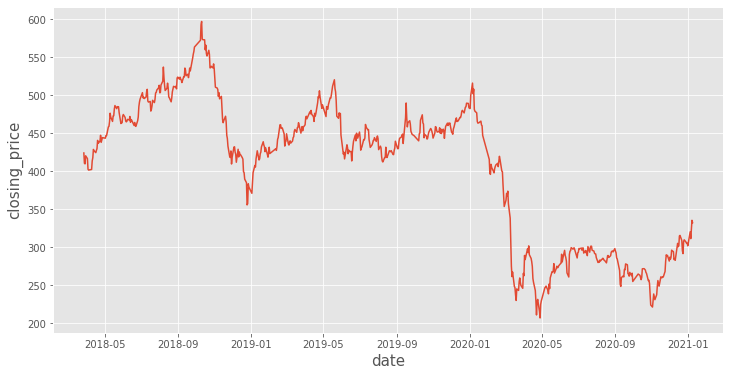

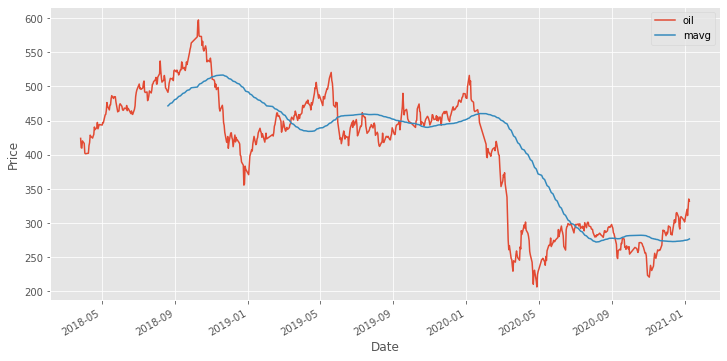

In [3]:

import matplotlib.pyplot as plt
%matplotlib inline
 
plt.figure(figsize = (12,6))
plt.plot(oil_train["closing_price"])
plt.xlabel('date',fontsize=15)
plt.ylabel('closing_price',fontsize=15)
plt.show()
 
 

close_px = oil_train['closing_price']
mavg = close_px.rolling(window=100).mean()
 
plt.figure(figsize = (12,6))
close_px.plot(label='oil')
mavg.plot(label='mavg')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

In [4]:
import matplotlib.dates as mdates
 
dates_oil = oil.copy()
dates_oil = oil.reset_index()
 
org_dates = dates_oil['date']
 

dates_oil['date'] = dates_oil['date'].map(mdates.date2num)
 
dates_oil.tail()

,date,closing_price,yield_rate
675,18631.0,320.1,0.025710
676,18632.0,311.1,-0.012386
677,18633.0,323.7,0.017243
678,18634.0,335.3,0.015291
679,18635.0,332.2,-0.004034


In [5]:
from sklearn.metrics import mean_squared_error        # 均方根误差
from sklearn.metrics import mean_absolute_error       # 平均绝对误差
from sklearn.metrics import r2_score                  # 校正决定系数R方值
from sklearn.metrics import mean_squared_log_error    # 均方根对数误差
from sklearn.metrics import median_absolute_error     # 中位数绝对误差
from sklearn.metrics import explained_variance_score  # 解释回归模型的方差得分

In [6]:
train_data = oil.loc[:,'closing_price'].values
print(train_data.shape) # 3016 

(680,)


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)

scaler.fit(train_data)
train_data = scaler.transform(train_data)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score,r2_score
dates = dates_oil['date'].values
prices = dates_oil['closing_price'].values
x_train,x_test,y_train,y_test=train_test_split(dates, prices,test_size=0.2,random_state=10)

In [9]:

def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)
    
    
# Create the data to train our model on:
time_steps = 36
X_train, y_train = create_dataset(train_data, time_steps)
 
# reshape it [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 36, 1))
 
print(X_train.shape)
 
 

print('X_train:')
print(str(scaler.inverse_transform(X_train[0])))
print("\n")
print('y_train: ' + str(scaler.inverse_transform(y_train[0].reshape(-1,1)))+'\n')

(644, 36, 1)
X_train:
[[424. ]
 [410.4]
 [409.7]
 [420.3]
 [416.6]
 [402.5]
 [401.5]
 [402.3]
 [413.5]
 [417.8]
 [428.7]
 [427. ]
 [424.4]
 [427.4]
 [429.7]
 [440.6]
 [436.7]
 [439.7]
 [447.3]
 [438. ]
 [441.4]
 [444.2]
 [443.5]
 [447. ]
 [446.9]
 [458.3]
 [459.1]
 [465.2]
 [476.4]
 [471.2]
 [465.6]
 [472.8]
 [473.1]
 [481.9]
 [486.5]
 [482.4]]


y_train: [[485.1]]



In [10]:

model = keras.Sequential()
 
model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
 
model.add(LSTM(units = 100))
model.add(Dropout(0.2))
 
model.add(Dense(units = 1))
 
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
 
history = model.fit(X_train, y_train, epochs = 20, batch_size = 10, validation_split=.30)

Epoch 1/20
45/45 [==============================] - 3s 30ms/step - loss: 0.0339 - val_loss: 0.0083
Epoch 2/20
45/45 [==============================] - 1s 17ms/step - loss: 0.0063 - val_loss: 0.0043
Epoch 3/20
45/45 [==============================] - 1s 17ms/step - loss: 0.0055 - val_loss: 0.0027
Epoch 4/20
45/45 [==============================] - 1s 16ms/step - loss: 0.0052 - val_loss: 0.0024
Epoch 5/20
45/45 [==============================] - 1s 17ms/step - loss: 0.0055 - val_loss: 0.0018
Epoch 6/20
45/45 [==============================] - 1s 17ms/step - loss: 0.0050 - val_loss: 0.0017
Epoch 7/20
45/45 [==============================] - 1s 17ms/step - loss: 0.0052 - val_loss: 0.0016
Epoch 8/20
45/45 [==============================] - 1s 26ms/step - loss: 0.0046 - val_loss: 0.0016
Epoch 9/20
45/45 [==============================] - 1s 30ms/step - loss: 0.0053 - val_loss: 0.0014
Epoch 10/20
45/45 [==============================] - 1s 29ms/step - loss: 0.0049 - val_loss: 0.0017
Epoch 11/

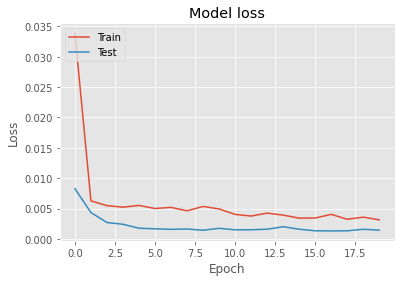

In [11]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

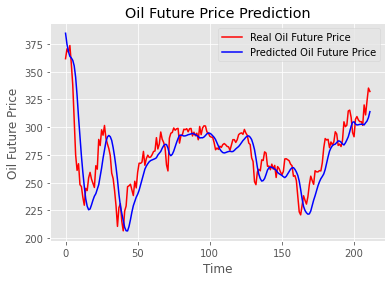

In [17]:
test_data = oil_test['closing_price'].values
test_data = test_data.reshape(-1,1)
test_data = scaler.transform(test_data)
 
time_steps = 36
X_test, y_test = create_dataset(test_data, time_steps)
 
y_test = y_test.reshape(-1,1)
org_y = scaler.inverse_transform(y_test)
 
X_test = np.reshape(X_test, (X_test.shape[0], 36, 1))
 
predicted_y = model.predict(X_test)
predicted_y = scaler.inverse_transform(predicted_y)
 
 
plt.plot(org_y, color = 'red', label = 'Real Oil Future Price')
plt.plot(predicted_y, color = 'blue', label = 'Predicted Oil Future Price')
plt.title('Oil Future Price Prediction')
plt.xlabel('Time')
plt.ylabel('Oil Future Price')
plt.legend()
plt.show()

In [16]:
print('平均绝对误差:', mean_absolute_error(org_y, predicted_y))
print('均方根误差:', mean_squared_error(org_y, predicted_y))
print('校正决定系数:', r2_score(org_y, predicted_y))
print('均方根对数误差:', mean_squared_log_error(org_y, predicted_y))
print('中位数绝对误差:', median_absolute_error(org_y, predicted_y))
print('解释回归模型的方差得分:', explained_variance_score(org_y, predicted_y))

平均绝对误差: 12.91187195687924
均方根误差: 297.14055731150296
校正决定系数: 0.6092700865545824
均方根对数误差: 0.004130101086970702
中位数绝对误差: 9.131898498535165
解释回归模型的方差得分: 0.629896116833853
